# 3.1 Classification with a single-layer perceptron

In [2]:
import numpy as np

### 3.1.1 Generation of linearly-separable data

In [3]:
n = 100

mA = [4, 1]
sigma = 1

aX = np.random.normal(mA[0], sigma, n)
aY = np.random.normal(mA[1], sigma, n)

In [4]:
a = np.stack((aX, aY, np.ones(n), np.zeros(n)), axis=1)

In [5]:
mB = [-4, 12]
sigma = 1

bX = np.random.normal(mB[0], sigma, n)
bY = np.random.normal(mB[1], sigma, n)

In [6]:
b = np.stack((bX, bY, np.ones(n), np.ones(n)), axis=1)

In [7]:
dataset = np.concatenate((a, b), axis=0)

In [8]:
np.random.shuffle(dataset)

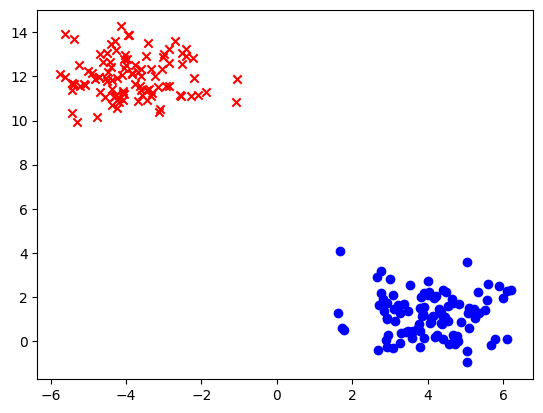

In [9]:
import matplotlib.pyplot as plt
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

### 3.1.2 Classification with a single-layer perceptron and analysis

In [10]:
learning_rate = 0.001
epochs = 2000

In [11]:
# Functions for Perceptron learning and delta learning rule
# learning rate and epochs are global variables

def perceptron_learning(dataset, weights, batch_size):
    for _ in range(epochs):
        idx = 0
        dataset_size = len(dataset)
        while idx < dataset_size:
            next_idx = idx + batch_size
            if next_idx <= dataset_size:
                y = np.matmul(weights, dataset[idx:next_idx,:3].transpose()) > 0
                weights = weights - learning_rate * np.matmul((y - dataset[idx:next_idx,3]), dataset[idx:next_idx,:3])
            # last batch
            else:
                y = np.matmul(weights, dataset[idx:,:3].transpose()) > 0
                weights = weights - learning_rate * np.matmul((y - dataset[idx:,3]), dataset[idx:,:3])
            idx = next_idx
    return weights


def delta_learning(dataset, weights, batch_size):
    for _ in range(epochs):
        idx = 0
        dataset_size = len(dataset)
        while idx < dataset_size:
            next_idx = idx + batch_size
            if next_idx <= dataset_size:
                y = np.matmul(weights, dataset[idx:next_idx,:3].transpose())
                weights = weights - learning_rate * np.matmul((y - dataset[idx:next_idx,3]), dataset[idx:next_idx,:3])
            # last batch
            else:
                y = np.matmul(weights, dataset[idx:,:3].transpose())
                weights = weights - learning_rate * np.matmul((y - dataset[idx:,3]), dataset[idx:,:3])
            idx = next_idx
    return weights

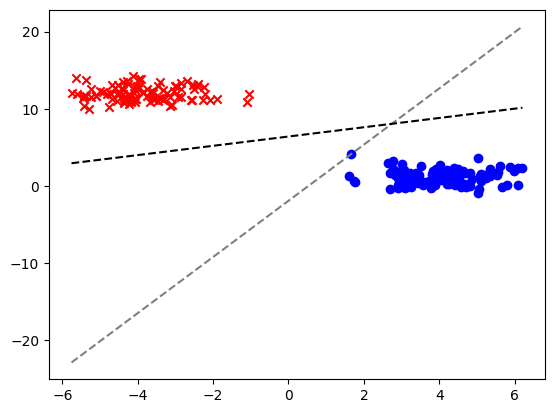

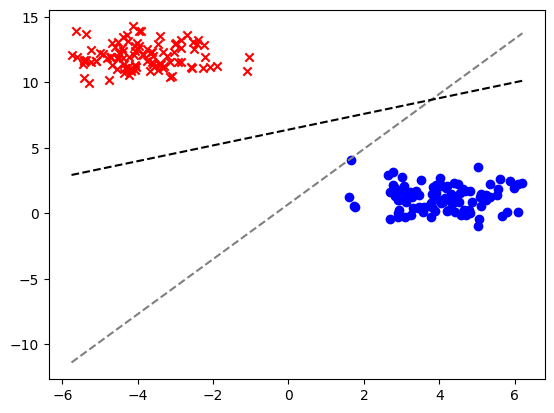

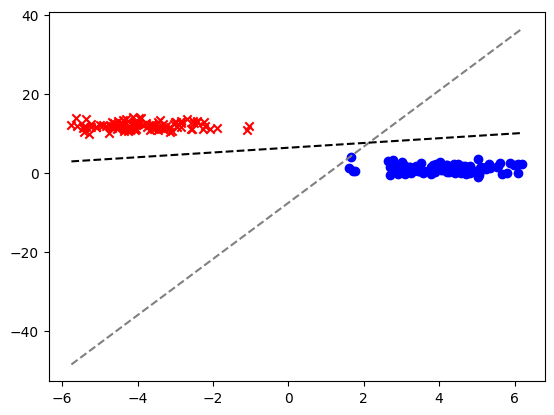

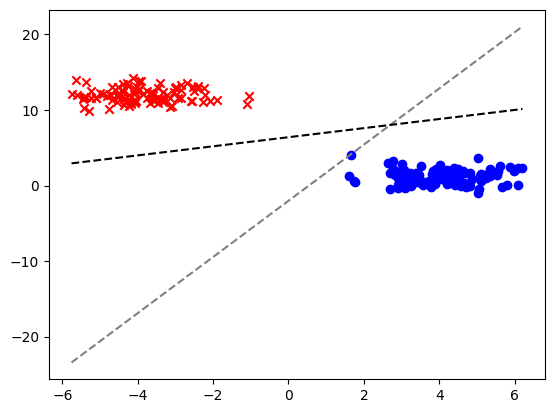

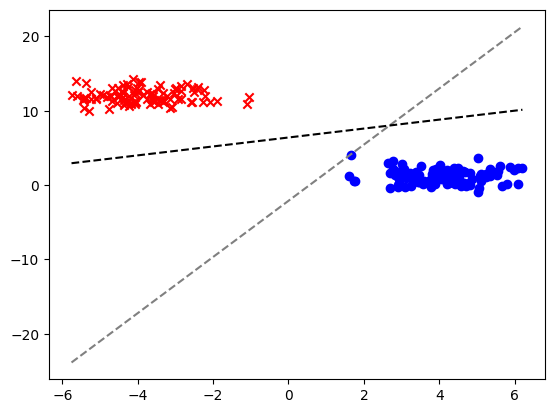

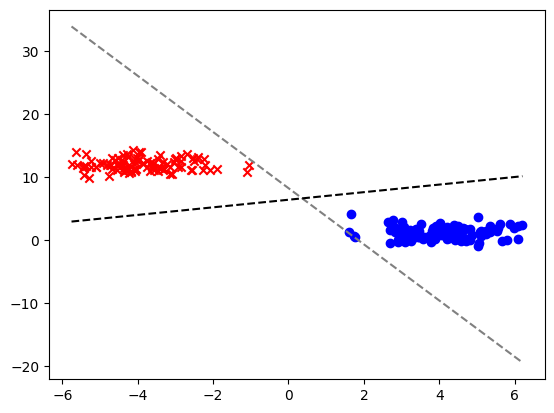

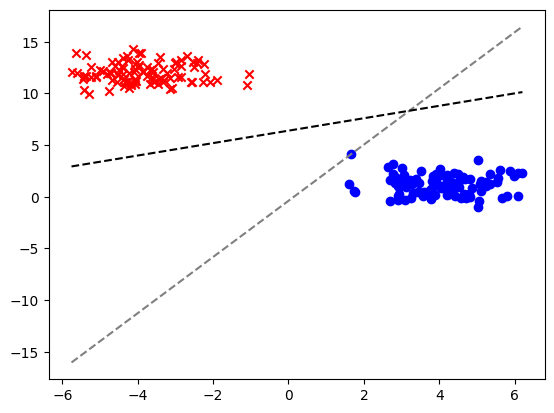

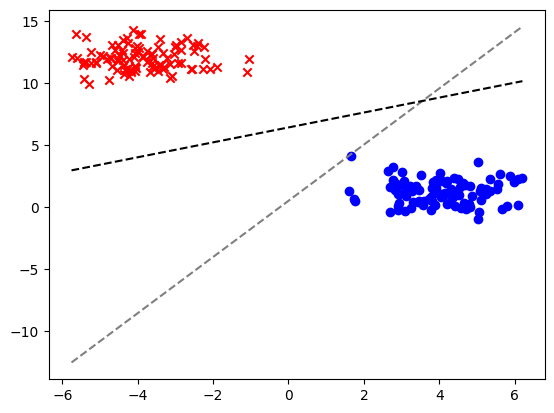

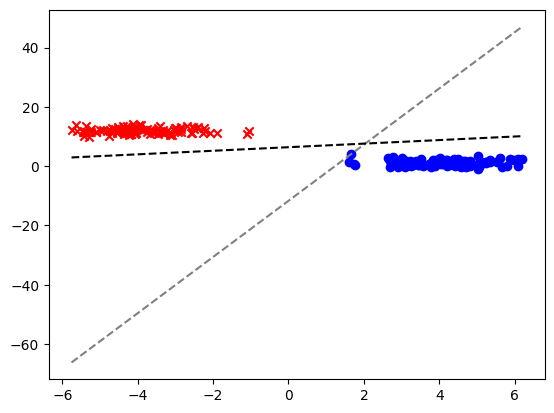

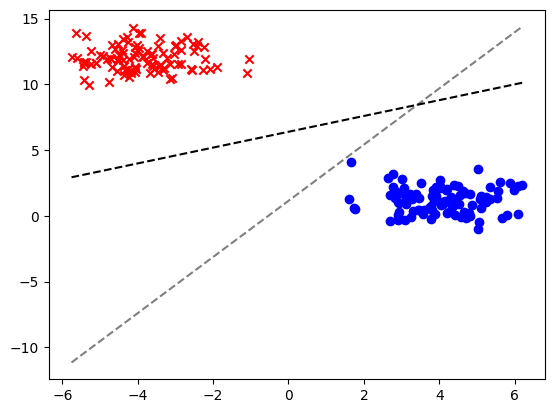

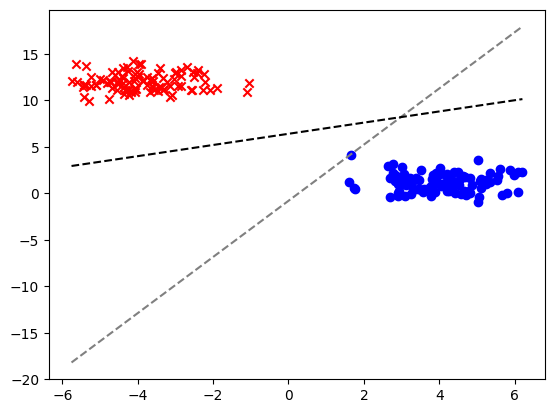

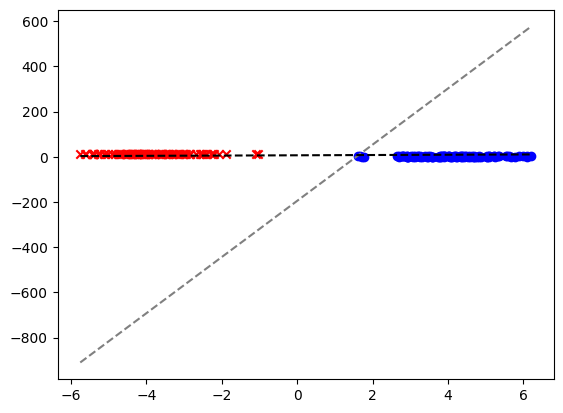

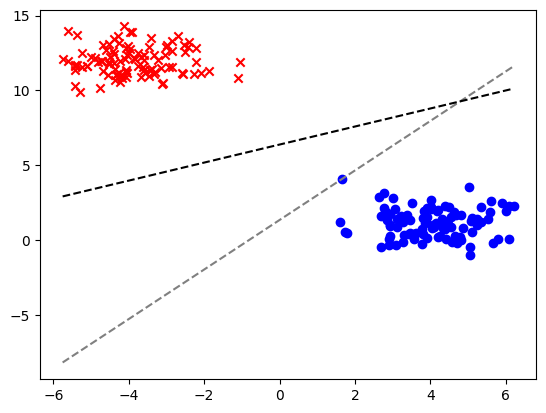

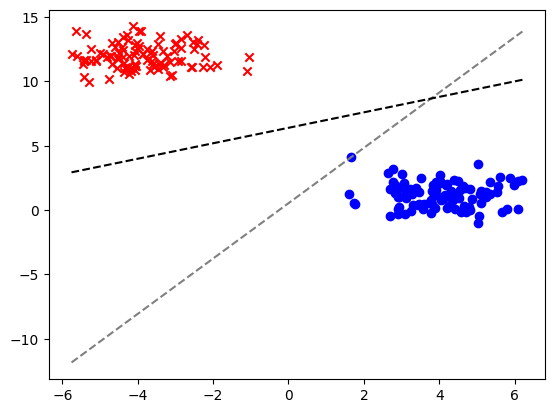

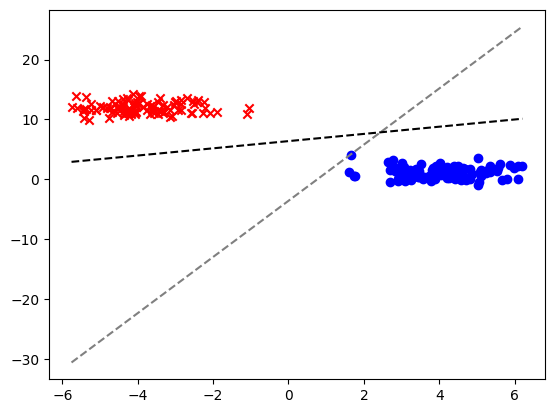

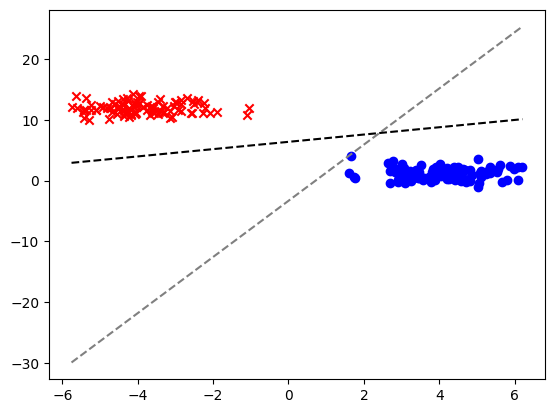

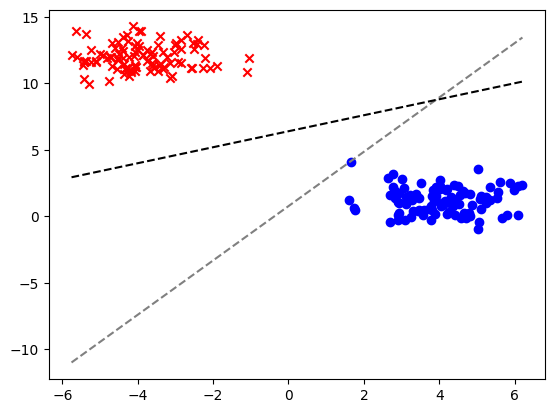

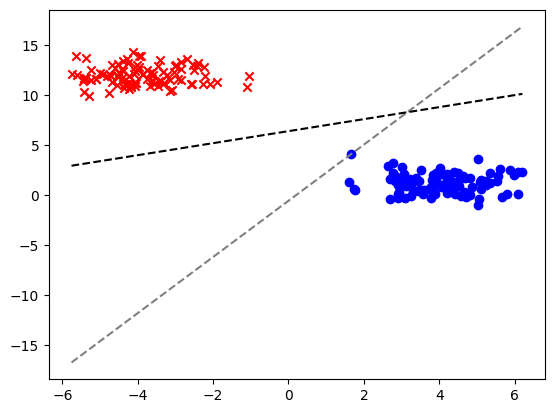

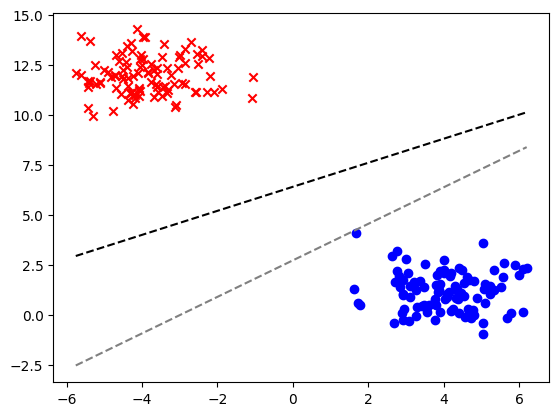

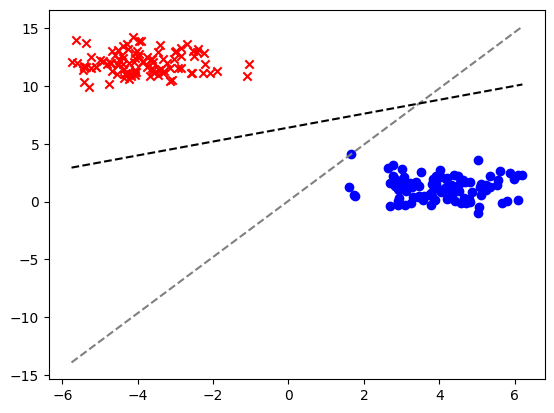

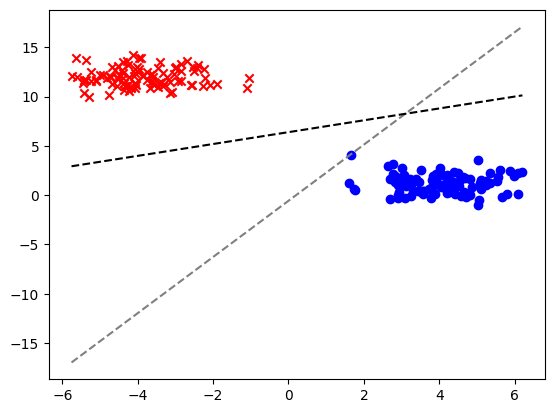

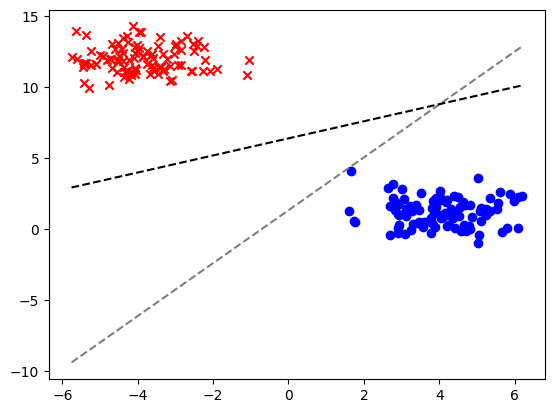

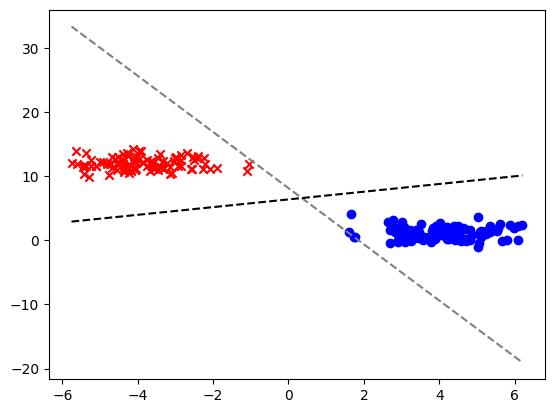

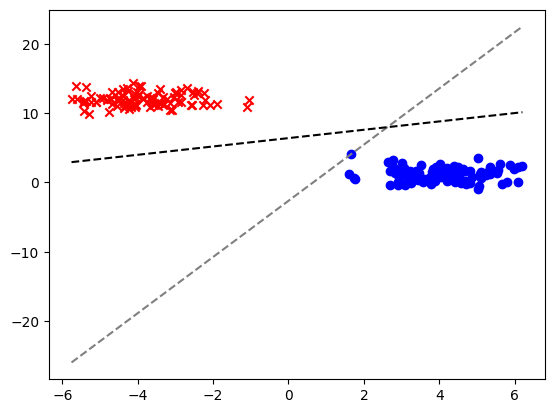

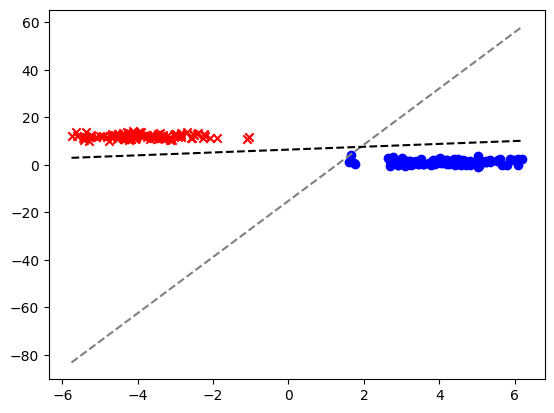

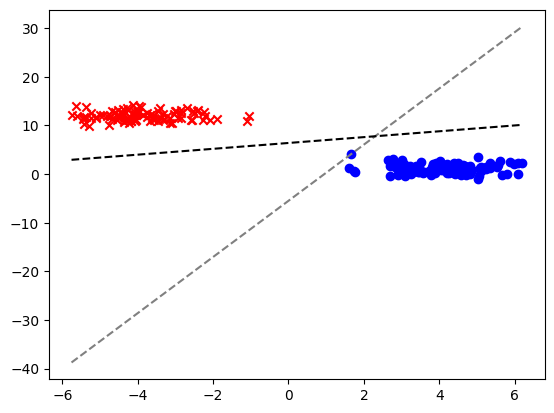

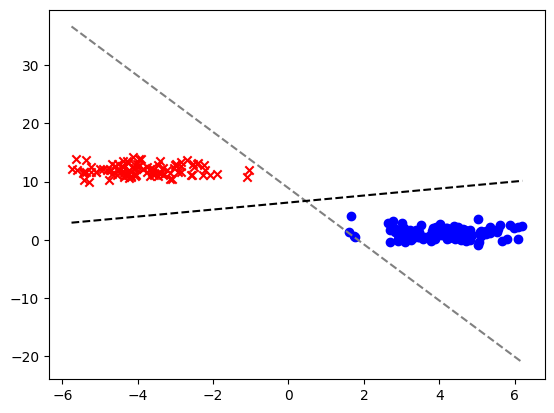

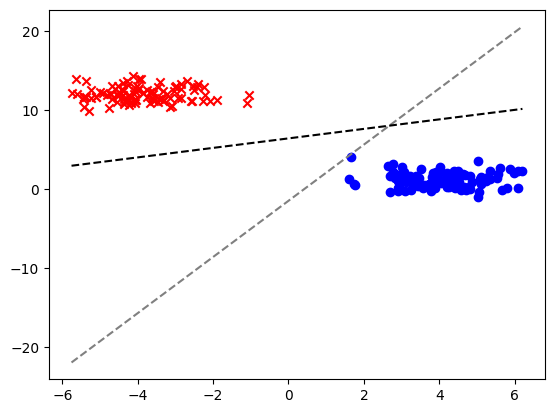

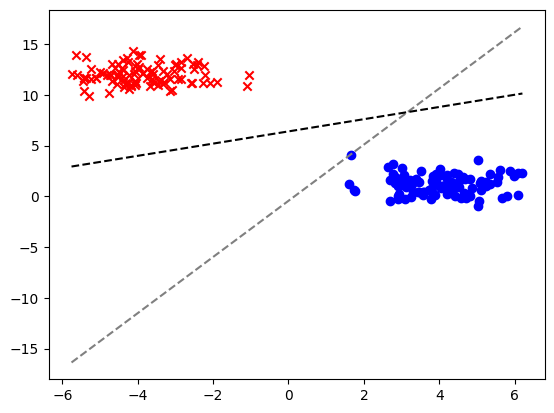

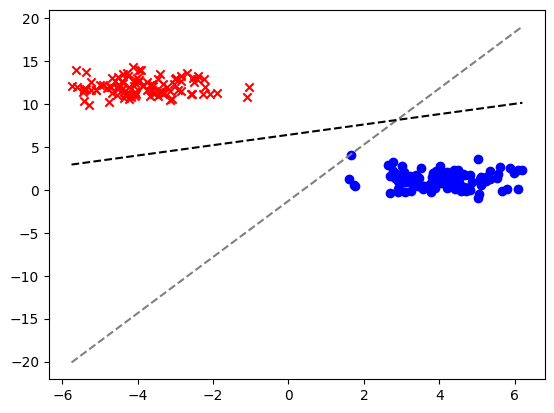

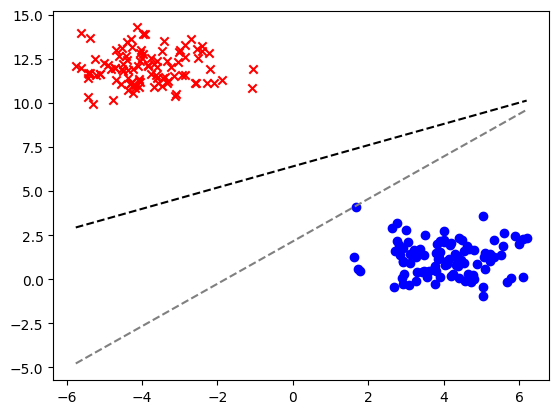

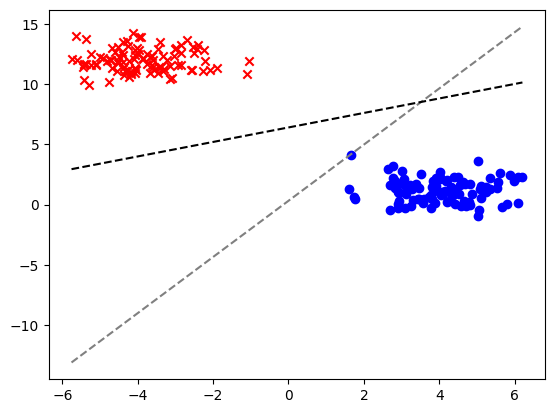

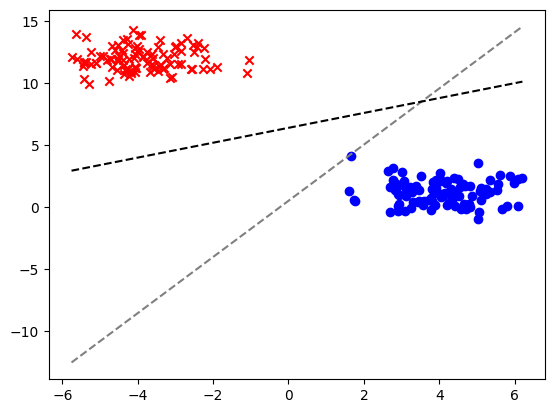

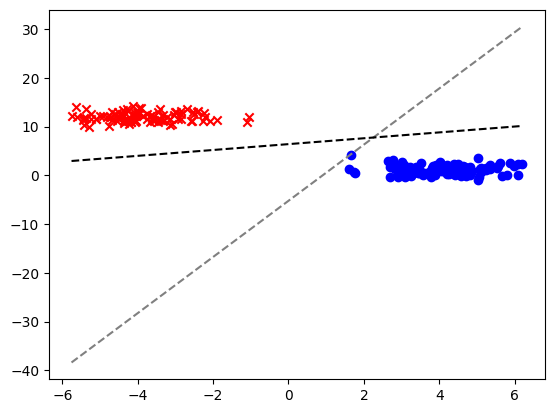

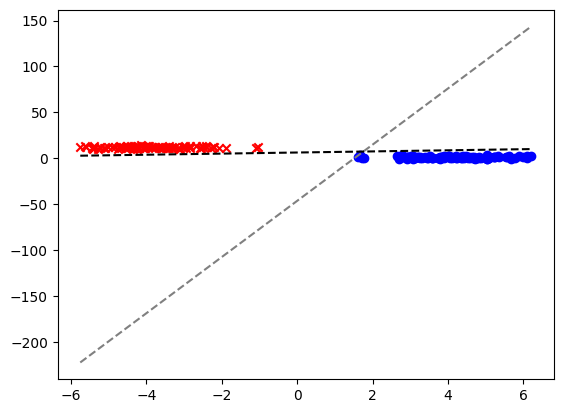

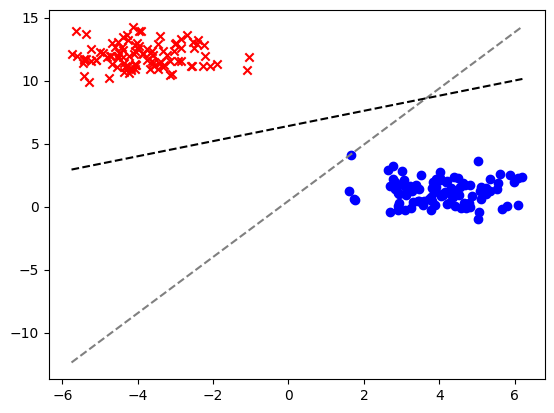

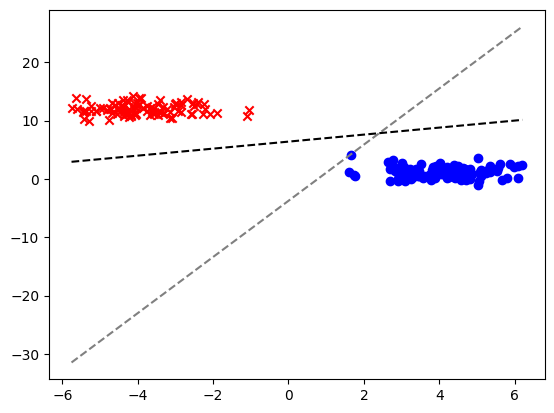

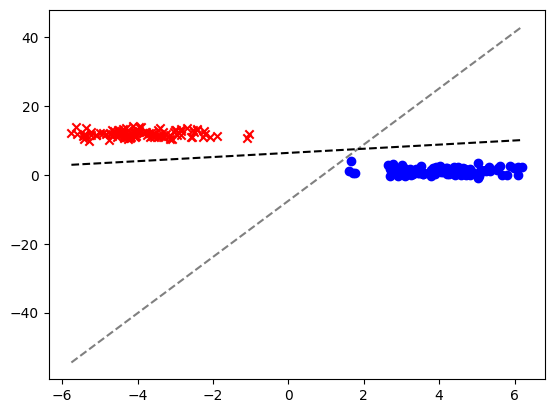

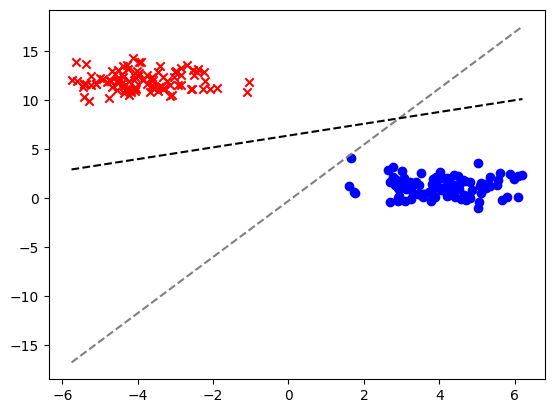

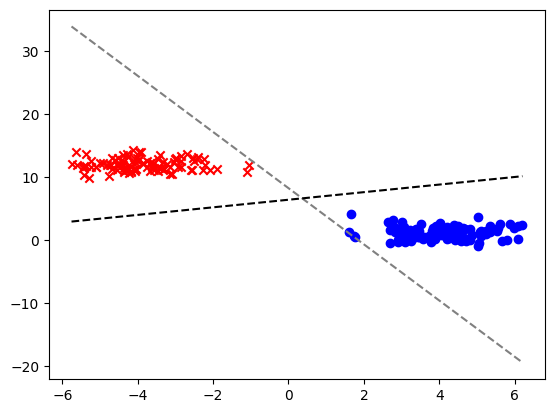

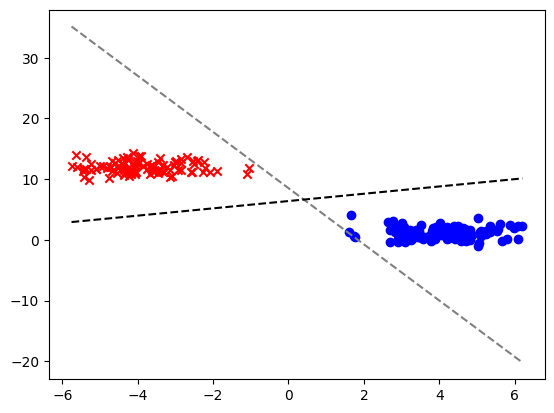

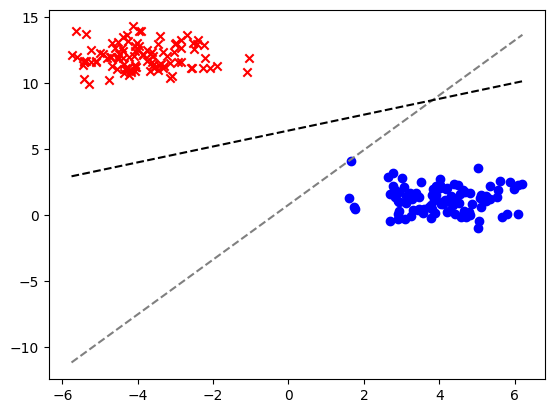

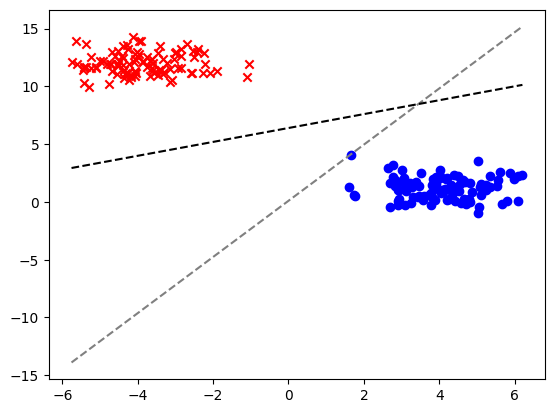

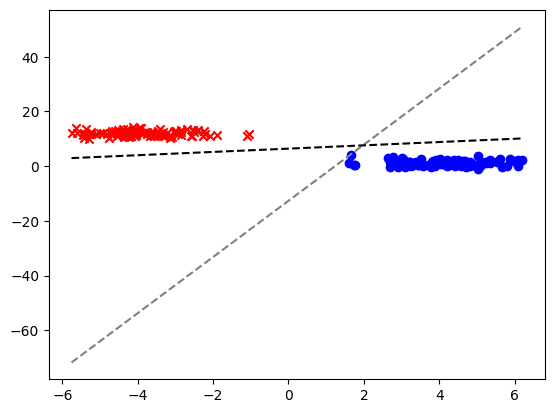

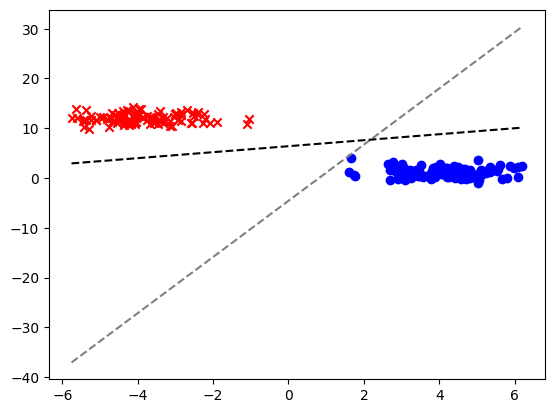

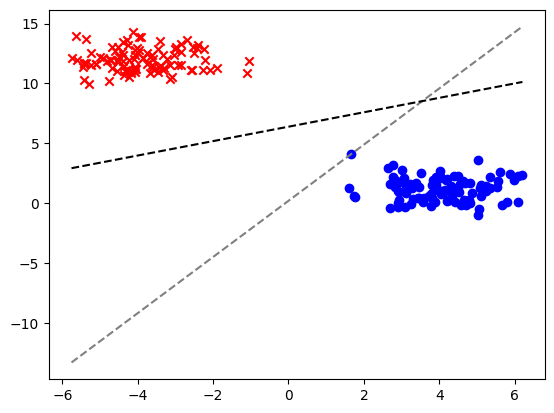

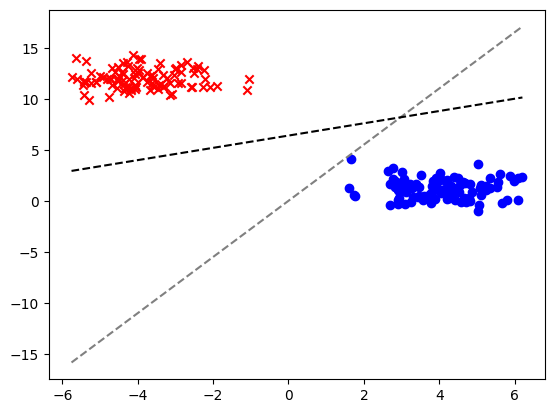

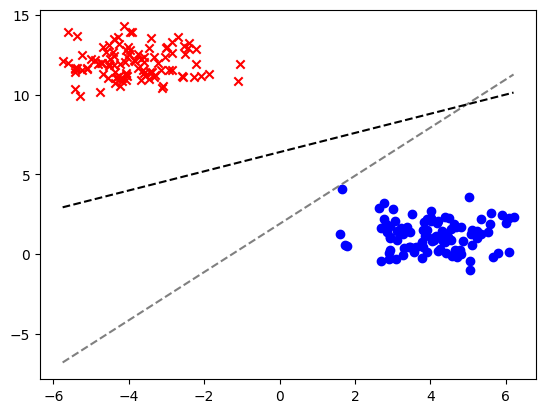

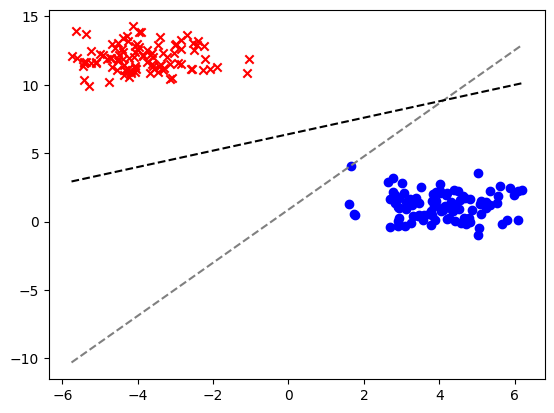

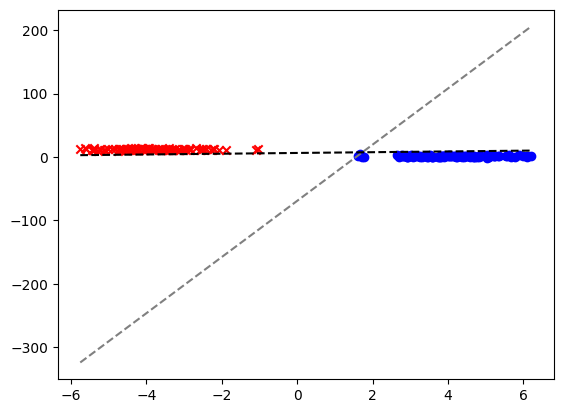

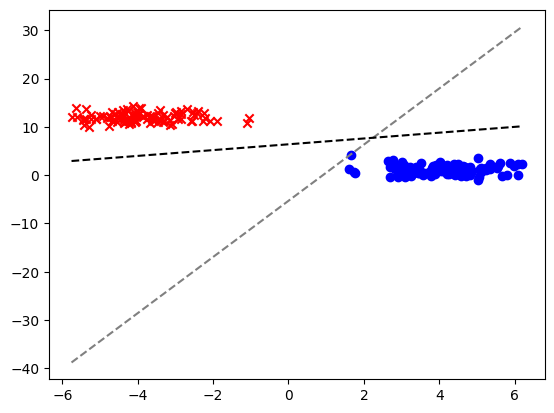

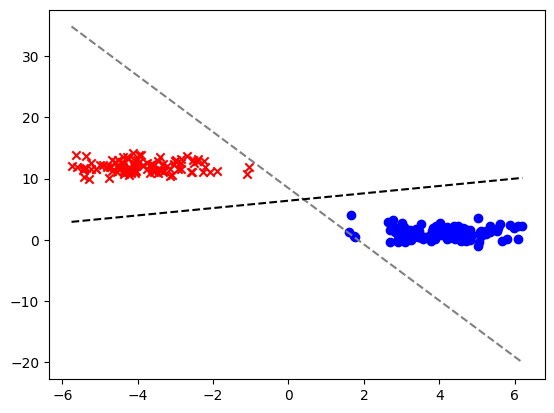

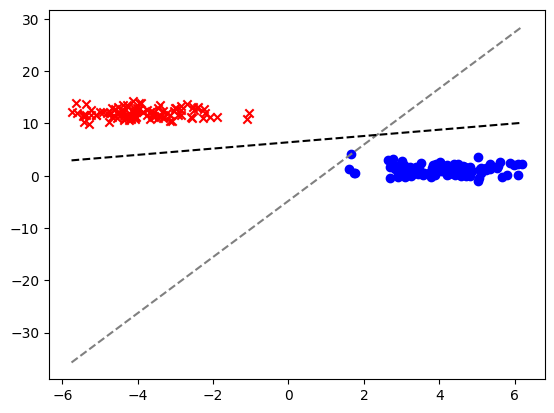

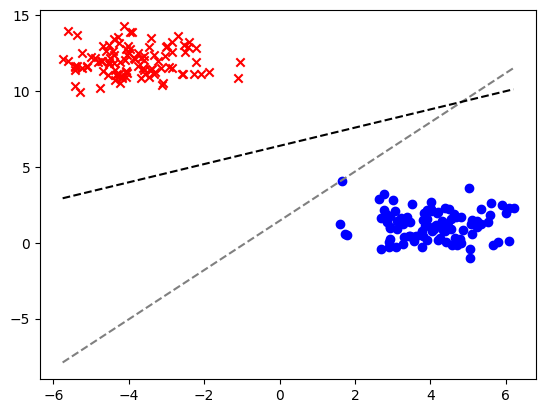

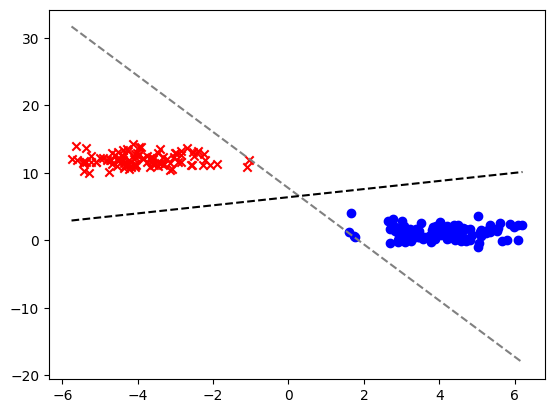

In [12]:
# Question 1 : Apply and compare perceptron learning with the delta learning rule in
# online (sequential) mode on the generated dataset. Adjust the learning
# rate and study the convergence of the two algorithms.
for _ in range(100):
    weights_pl = np.random.rand(3)
    weights_dlr = np.copy(weights_pl)
    xmin = min(dataset[:,0])
    xmax = max(dataset[:,0])
    x = np.linspace(xmin, xmax, 20)

    # Online mode
    batch_size = 1

    ### Perceptron learning

    weights_pl = perceptron_learning(dataset, weights_pl, batch_size)
    y = (-weights_pl[2] - weights_pl[0] * x) / weights_pl[1]

    plt.plot(x, y, c='grey', linestyle='--')

    ### Delta learning rule

    # ground truth in {-1, 1}
    dataset_symetric = np.copy(dataset)
    dataset_symetric[:,3] = 2 * (dataset_symetric[:,3] - 0.5)

    weights_dlr = delta_learning(dataset_symetric, weights_dlr, batch_size)

    y = (-weights_dlr[2] - weights_dlr[0] * x) / weights_dlr[1]

    plt.plot(x, y, c='black', linestyle='--')

    # Plot of dataset
    plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
    plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')
    plt.show()

Compare both algorithms:   
Both converge. Really depend of the hyperparameters, and initialization of the weights.   
--> lr=0.01 / e=10 perceptron converge mostly, not delta. Might be cause lr is to high for delta rule.   
--> lr=0.0001 / e=20 delta works! but not perceptron anymore...

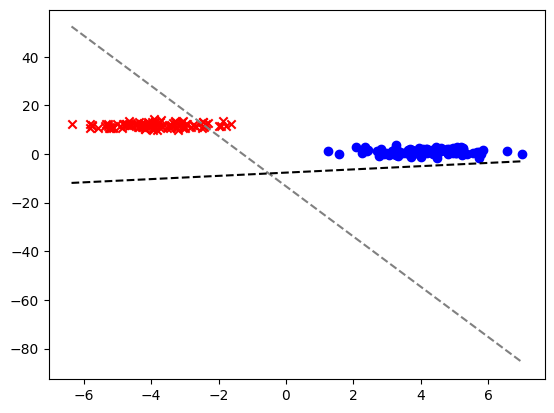

In [ ]:
# Question 2 : Compare sequential with a batch learning approach for the delta rule. How
# quickly (in terms of epochs) do the algorithms converge? Please adjust the
# learning rate and plot the learning curves for each variant. Bear in mind
# that for sequential learning you should not use the matrix form of the lear-
# ning rule discussed in section 2.2 and instead perform updates iteratively
# for each sample. How sensitive is learning to random initialisation?

weights_pl = np.random.rand(3)
weights_dlr = np.copy(weights_pl)
xmin = min(dataset[:,0])
xmax = max(dataset[:,0])
x = np.linspace(xmin, xmax, 20)

# Online mode
batch_size = 1

### Perceptron learning

weights_pl = perceptron_learning(dataset, weights_pl, batch_size)
y = (-weights_pl[2] - weights_pl[0] * x) / weights_pl[1]

plt.plot(x, y, c='grey', linestyle='--')

### Delta learning rule

# ground truth in {-1, 1}
dataset_symetric = np.copy(dataset)
dataset_symetric[:,3] = 2 * (dataset_symetric[:,3] - 0.5)

weights_dlr = delta_learning(dataset_symetric, weights_dlr, batch_size)

y = (-weights_dlr[2] - weights_dlr[0] * x) / weights_dlr[1]

plt.plot(x, y, c='black', linestyle='--')

# Plot of dataset
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')


In [ ]:
def perceptron_decision(weights, dataset):
    good = 0
    for data in dataset:
        good += np.matmul(weights, data[:3].transpose()) > 0 == data[3]
        print(data[3])
    return good/len(dataset)

perceptron_decision(weights_pl, dataset)

1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0


0.0

### 3.1.3 Classification of samples that are not linearly separable